## Interagindo com Banco de Dados Relacional

### MySQL

### pip install mysql-connector-python

In [121]:
# Importação de bibliotecas
import mysql.connector
from mysql.connector import errorcode
from datetime import date, datetime
import pandas as pd

# Estabelece a conexão com o banco de dados
try:
    conn = mysql.connector.connect(user='root', password='master',
                              host='localhost',
                              database='bd',
                              autocommit=False)
except mysql.connector.Error as error:
    print("Não foi possível realizar a conexão com o banco de dados {}.".format(error))

# Apresenta o valor da propriedade autocommit. 
print(conn.autocommit)   
conn.autocommit = True
print(conn.autocommit)
conn.autocommit = False
print(conn.autocommit)

False
True
False


##### Criando tabelas no Banco de Dados

In [122]:
tables = {}
tables['departamento'] = (
    "CREATE TABLE `departamento` ("
    "  `id_depto` integer NOT NULL AUTO_INCREMENT,"
    "  `nome` varchar(100) NOT NULL,"
    "  PRIMARY KEY (`id_depto`)"
    ")")    
tables['empregado'] = (
    "CREATE TABLE `empregado` ("
    "  `id_emp` INTEGER NOT NULL AUTO_INCREMENT,"
    "  `nome` VARCHAR(100) NOT NULL,"
    "  `data_nascimento` timestamp,"
    "  `data_contratacao` timestamp,"
    "  `id_depto` integer,"
    "  PRIMARY KEY (`id_emp`),"
    "  FOREIGN KEY(`id_depto`) REFERENCES `departamento` (`id_depto`)"
    ")")


In [123]:
try:
    cursor = conn.cursor()

    for table_name in tables:
        table_description = tables[table_name]
        try:
            print("Criando tabela {}: ".format(table_name), end='')
            cursor.execute(table_description)
        except mysql.connector.Error as err:
            if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
                print("Tabela já existe.")
            else:
                print(err.msg)
        else:
            print("OK")
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close()        

Criando tabela departamento: Tabela já existe.
Criando tabela empregado: Tabela já existe.


##### Executando declarações SQL não parametrizáveis

In [124]:
# Insere alguns departamentos
try:
    cursor = conn.cursor()
    insert = ("INSERT INTO departamento (id_depto, nome) VALUES (1, 'Departamento 1')")
    cursor.execute(insert)
    print("Departamento inserido com sucesso!!!")
    insert = ("INSERT INTO departamento (id_depto, nome) VALUES (2, 'Departamento 2')")
    cursor.execute(insert)
    print("Departamento inserido com sucesso!!!")
    conn.commit()
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
      cursor.close()  

Ocorreu um erro durante o processamento 1062 (23000): Duplicate entry '1' for key 'PRIMARY'.


In [130]:
# Insere um empregado
try:
    cursor = conn.cursor()
    insert = ("INSERT INTO empregado (nome, data_nascimento, data_contratacao, id_depto)" 
              "VALUES ('Empregado 1','1997-6-14','2022-10-10', 1)")
    cursor.execute(insert)
    conn.commit()
    print("Empregado inserido com sucesso!!!")
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
      cursor.close()        

Empregado inserido com sucesso!!!


In [133]:
try:
    cursor = conn.cursor()

    select = ("SELECT id_emp, nome, data_nascimento, data_contratacao, "
              "id_depto FROM empregado")

    cursor.execute(select)

    for (id_emp, nome, data_nascimento, data_contratacao, id_depto) in cursor:
      print("{}, {}, nascido em {:%d/%m/%Y}, foi contratado em {:%d/%m/%Y} para "
            "trabalhar no departamento {}.".format(id_emp, nome, data_nascimento, 
            data_contratacao, id_depto))

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close()   

36, Empregado 2, nascido em 12/02/1980, foi contratado em 16/11/2022 para trabalhar no departamento 1.
37, Empregado 3, nascido em 23/05/1999, foi contratado em 16/11/2022 para trabalhar no departamento 1.
38, Empregado 4, nascido em 03/10/1987, foi contratado em 16/11/2022 para trabalhar no departamento 2.
39, Empregado 5, nascido em 11/07/1993, foi contratado em 16/11/2022 para trabalhar no departamento 2.


In [132]:
# Elimina uma ou mais linhas da tabela empregado
try:
    cursor = conn.cursor()
    delete = ("DELETE FROM empregado WHERE nome = 'Empregado 1'")
    cursor.execute(delete)
    conn.commit()
    print("Exclusão ocorrida com sucesso!!!")
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close()

Exclusão ocorrida com sucesso!!!


##### Executando declarações SQL parametrizáveis

In [134]:
try:
  
  cursor = conn.cursor()

  datetime = datetime.now()

  insert_employee = ("INSERT INTO empregado "
                "(nome, data_nascimento, data_contratacao, id_depto) "
                "VALUES (%s, %s, %s, %s)")

  data_employee = ('Empregado 1', date(1977, 6, 14), datetime, 1)

  many_data_employee = [
    ('Empregado 2', date(1980, 2, 12), datetime, 1),
    ('Empregado 3', date(1999, 5, 23), datetime, 1),
    ('Empregado 4', date(1987, 10, 3), datetime, 2),
    ('Empregado 5', date(1993, 7, 11), datetime, 2)
  ]

  # Insere um empregado
  cursor.execute(insert_employee, data_employee)
  print("Empregado inserido com sucesso!!!")

  # Insere vários empregados
  cursor.executemany(insert_employee, many_data_employee)
  print("Empregados inseridos com sucesso!!!")

  conn.commit()

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close() 

Empregado inserido com sucesso!!!
Empregados inseridos com sucesso!!!


In [138]:
try:
  
  cursor = conn.cursor()

  query = ("SELECT id_emp, nome, data_nascimento, data_contratacao, id_depto FROM empregado "
          "WHERE data_nascimento BETWEEN %s AND %s")

  hire_start = date(1977, 1, 1)
  hire_end = date(2000, 12, 31)

  cursor.execute(query, (hire_start, hire_end))

  for (id_emp, nome, data_nascimento, data_contratacao, id_depto) in cursor:
    print("{}, {} foi contratado em {:%d/%m/%Y} para trabalhar no departamento {}".format(
      id_emp, nome, data_contratacao, id_depto))

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close() 

36, Empregado 2 foi contratado em 16/11/2022 para trabalhar no departamento 1
37, Empregado 3 foi contratado em 16/11/2022 para trabalhar no departamento 1
38, Empregado 4 foi contratado em 16/11/2022 para trabalhar no departamento 2
39, Empregado 5 foi contratado em 16/11/2022 para trabalhar no departamento 2
43, Empregado 1 foi contratado em 16/11/2022 para trabalhar no departamento 2
44, Empregado 2 foi contratado em 16/11/2022 para trabalhar no departamento 1
45, Empregado 3 foi contratado em 16/11/2022 para trabalhar no departamento 1
46, Empregado 4 foi contratado em 16/11/2022 para trabalhar no departamento 2
47, Empregado 5 foi contratado em 16/11/2022 para trabalhar no departamento 2


In [137]:
try:
  
  cursor = conn.cursor()

  query = ("UPDATE empregado set id_depto = %s "
          " WHERE nome = %s")

  cursor.execute(query, (2, 'Empregado 1'))
  
  print("Atualização realizado com sucesso!!!")

  conn.commit()

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close() 

Atualização realizado com sucesso!!!


#### Realizando uma consulta com função de agregação e apresentando o gráfico resultante

In [139]:
# Executa uma consulta com agregação e armazena o resultado em um DataFrame
query = ("select d.nome as 'Nome do Departamento', count(*) as 'Total de Empregados' "
         " from empregado as e inner join departamento as d " 
	     " on e.id_depto = d.id_depto "
         " group by 1")
df = pd.read_sql(query, con = conn)
df

d:\ArquivosProgramas\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Nome do Departamento,Total de Empregados
0,Departamento 1,4
1,Departamento 2,5


<AxesSubplot:xlabel='Nome do Departamento'>

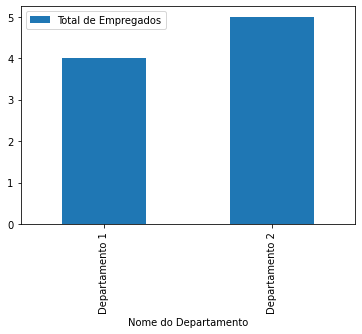

In [140]:
df.plot(kind="bar", x="Nome do Departamento")

In [141]:
if conn.is_connected():
    try:
        conn.close()
        print("Conexão encerrda com sucesso!!!")
    except mysql.connector.Error as error:
        print("Ocorreu um erro durante o processamento {}.".format(error))


Conexão encerrda com sucesso!!!


### PostgreSQL

### pip install psycopg2

In [14]:
import psycopg2
cnx = psycopg2.connect(host='localhost', port='5432', database='bd', user='postgres', password='master')
cursor = cnx.cursor()
cnx.autocommit

False

In [8]:
sql = 'create table cidade (id serial primary key, nome varchar(100), uf varchar(2))'
try:
    cursor.execute(sql)
except Exception as err:
    print("Tabela já existe.")
    cnx.rollback()
else:
    print("OK")

Tabela já existe.


In [9]:
sql = "insert into cidade values (default,'Santa Catarina','SC')"
cursor.execute(sql)

In [10]:
cursor.execute('select * from cidade')
recset = cursor.fetchall()
for rec in recset:
    print (rec)

(1, 'Santa Catarina', 'SC')
(2, 'Santa Catarina', 'SC')
(3, 'Santa Catarina', 'SC')
(4, 'Santa Catarina', 'SC')
(5, 'Santa Catarina', 'SC')
(6, 'Santa Catarina', 'SC')
(7, 'Santa Catarina', 'SC')


In [11]:
cnx.commit()

In [12]:
cnx.close()